In [3]:
# source: https://www.codesansar.com/numerical-methods/
#         runge-kutta-fourth-order-rk4-python-program.htm

import cmath #To help us out with the complex square root
import numpy as np #For the arrays
import matplotlib.pyplot as plt #Visualization

# deleting profile and radmass files
# os.remove("radmass.txt")
# os.remove("profile.txt")

# some constants
GS = 1.325 * 10**(-12) # Newton constant in m^4 / MeV fm^3
MSS = 1.1155 * 10**(15) # Sun's mass in MeV m^3 / fm^3
PI = np.pi 
HC = 197.327 # hc=1=197.327 MeV fm
kappa = 1/(16*PI*GS)

UBQ = np.sqrt(4*kappa/3)
Qinf = 0. # .29*UBQ   # not more than .29*UBQ is save up to PCC=1200
eta = -1.
Q = Qinf

# define energy density as function of pressure

def eden(P):
    return 3*P + 4*(145**4/(HC*HC*HC))

def dedP(P):
    return 3.

# the TOV GR equation

def b1(r,P,f,b):
    return (1-f)*b/(r*f)

def P1(r,P,f,b):
    return -(eden(P)+P) * b1(r,P,f,b)/(2*b)

def f1(r,P,f,b):
    A = r*b/f*(P*r**2+4*kappa)-3*eta*Qinf**2*r
    B = 3*(1-f)*eta*Qinf**2 
    B = B + b/f*(6*r**2*f*P + (1+f)*r**2*eden(P) -4*kappa*(1-f))
    return -B/A

# define the Runge-Kutta 4th order for the problem
# if we want to print the profile, set profile=1
# if we not, set profile=0
def RungeKutta(rCC,bCC,PCC,fCC,h,profile):
    # input initial values
    r0 = rCC
    b0 = bCC
    P0 = PCC
    f0 = fCC
    while (P0 > 0.):
        if profile == 1:
            print(r0, b0, P0, f0, file=open('profileST.dat', 'a'))
        # calculate k1
        r01 = r0
        b01 = b0
        P01 = P0
        f01 = f0
        k1_b = h * b1(r01,P01,f01,b01)
        k1_P = h * P1(r01,P01,f01,b01)
        k1_f = h * f1(r01,P01,f01,b01)
        # calculate k2
        r01 = r0 + h/2
        b01 = b0 + k1_b/2
        P01 = P0 + k1_P/2
        f01 = f0 + k1_f/2
        k2_b = h * b1(r01,P01,f01,b01)
        k2_P = h * P1(r01,P01,f01,b01)
        k2_f = h * f1(r01,P01,f01,b01)
        # calculate k3
        r01 = r0 + h/2
        b01 = b0 + k2_b/2
        P01 = P0 + k2_P/2
        f01 = f0 + k2_f/2
        k3_b = h * b1(r01,P01,f01,b01)
        k3_P = h * P1(r01,P01,f01,b01)
        k3_f = h * f1(r01,P01,f01,b01)
        # calculate k4
        r01 = r0 + h
        b01 = b0 + k3_b
        P01 = P0 + k3_P
        f01 = f0 + k3_f
        k4_b = h * b1(r01,P01,f01,b01)
        k4_P = h * P1(r01,P01,f01,b01)
        k4_f = h * f1(r01,P01,f01,b01)
        # calculate the next r0, P0, m0, and b0
        r0 = r0 + h
        b0 = b0 + (k1_b+2*k2_b+2*k3_b+k4_b)/6
        P0 = P0 + (k1_P+2*k2_P+2*k3_P+k4_P)/6
        f0 = f0 + (k1_f+2*k2_f+2*k3_f+k4_f)/6
    # the results at the surface
    output = np.array([r0,b0,P0,f0])
    return output

In [4]:
PCC = 300. # pressure at the center in MeV / fm^3
bCC = 1. # metric function b(r) at the center
LBQ2 = 12*PCC*kappa*bCC/(abs(eta)*(3*PCC-eden(PCC)))
UBQ2 = 4*kappa*bCC/(3*abs(eta))
print(Qinf**2/LBQ2,Qinf**2/UBQ2)

-0.0 0.0


In [8]:
# this is only for a single PCC

# define initial parameters
rCC = .000000001 # radius near center in m--the starting point
rmax = 100000. # radius at far distances in m
PCC = 2*600. # pressure at the center in MeV / fm^3
fCC = 1. # metric function f(r) at the center
bCC = 1. # metric function b(r) at the center

h = 1. # h-step

UBQ = np.sqrt(4*kappa/3)
Qinf = 0. #.29*UBQ   # not more than .29*UBQ is save up to PCC=1200
eta = -1.
Q = Qinf

# calculate the surface values
output=RungeKutta(rCC,bCC,PCC,fCC,h,0)
# print(output)

# at the surface, b = 1-2Gm/r, which is different to the result
rSurface=output[0]
bSurface=output[1]
fSurface=output[3]
mSurface=(1-fSurface)*rSurface/(2*GS*MSS)
print(PCC, (rSurface/1000), mSurface, 
          GS*MSS*mSurface/rSurface, Qinf/UBQ, Q/UBQ) 
bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface

# NOTICE: cannot use it since R and M chaages
# instead we follow the paper by Cisterna PRD92,044050(2015)
# i.e. bCC will not be modified, but Q is modified instead 

# Or rather inputting Qinf fixed instead and calculate Q,
# which is done by only modifying bCC,
# then Q=Q/np.sqrt(bCorrection)

# So, we redefine bCC as follows
bCorrection=bSurfaceTarget/bSurface  # bCorrection=1/binf
print(abs(bCorrection-1))
# bCC and Q will be modified into bCC*bCorrection
# and Q*np.sqrt(bCorrection) 

# if abs(bCorrection) not near 1, then recalculate
while (abs(bCorrection-1)>10**(-3)):
    bCC=bCC*bCorrection
    Q=Q/np.sqrt(bCorrection)
    output=RungeKutta(rCC,bCC,PCC,fCC,h,0)
    # print(output)
    rSurface=output[0]
    bSurface=output[1]
    fSurface=output[3]
    mSurface=(1-fSurface)*rSurface/(2*GS*MSS)
    print(PCC, (rSurface/1000), mSurface, 
          GS*MSS*mSurface/rSurface, Qinf/UBQ, Q/UBQ) 
    bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
    bCorrection=bSurfaceTarget/bSurface
    print(abs(bCorrection-1))

# We NEED to redefine both b and Q
# so that R and M don'o't change
# --they change if we didn't
# redefine Q

1200.0 9.022000000001 1.6803112780868459 0.275278550286523 0.0 0.0
0.9038698617358731
1200.0 9.022000000001 1.6803112780868452 0.2752785502865229 0.0 0.0
4.440892098500626e-16


In [9]:
# if we want to print the profile, run this  
output=RungeKutta(rCC,bCC,PCC,fCC,h,1)
print(output)
rSurface=output[0]
bSurface=output[1]
fSurface=output[3]
mSurface=(1-fSurface)*rSurface/(2*GS*MSS)
print(PCC, (rSurface/1000), mSurface, 
          GS*MSS*mSurface/rSurface, Qinf/UBQ, Q/UBQ) 

[ 9.02200000e+03  4.49442899e-01 -3.07329600e-03  4.49442899e-01]
1200.0 9.022000000001 1.6803112780868452 0.2752785502865229 0.0 0.0


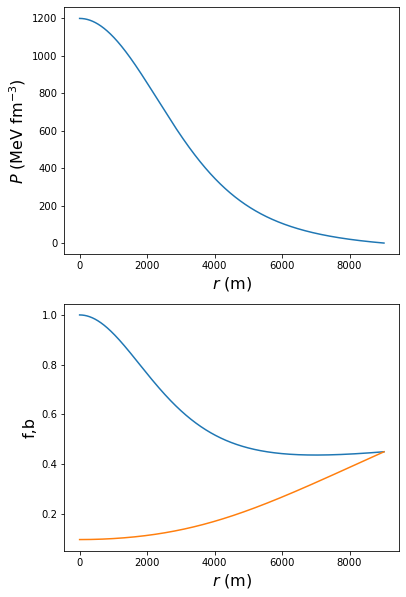

In [11]:
# plotting the profile from 1 PCC

profile=np.loadtxt("profileST.dat")[:, :]
profr0=profile[:,0]
profb0=profile[:,1]
profP0=profile[:,2]
proff0=profile[:,3]

fig, ax = plt.subplots(2, 1, figsize = (6,10))

ax[0].plot(profr0, profP0)
ax[0].set_xlabel(r'$r$ (m)', fontsize=16)
ax[0].set_ylabel(r'$P$ (MeV fm$^{-3}$)', fontsize=16)

ax[1].plot(profr0, proff0, profr0, profb0)
ax[1].set_xlabel(r'$r$ (m)', fontsize=16)
ax[1].set_ylabel(r'f,b', fontsize=16)

plt.show()

In [12]:
print(1/(12*PI),4*kappa/3*GS,(0.29*UBQ)**2*GS)

0.026525823848649224 0.02652582384864922 0.0022308217856713995


In [14]:
# FOR MULTIPLE PCC

h = 1. # h-step

for x in range(600, 0, -1):
    # define initial parameters
    PCC=x    # pressure at the center in MeV / fm^3
    fCC = 1. # metric function f(r) at the center
    bCC = 1. # metric function b(r) at the center
    UBQ=np.sqrt(4*kappa/3)
    Qinf = 0. # .29*UBQ
    eta = -1.
    Q = Qinf
    
    # calculate the surface values
    output=RungeKutta(rCC,bCC,PCC,fCC,h,0)
    # at the surface, b = 1-2Gm/r, which is different to the result
    rSurface=output[0]
    bSurface=output[1]
    fSurface=output[3]
    mSurface=(1-fSurface)*rSurface/(2*GS*MSS)
    bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
    
    # So, we redefine bCC and Q using
    bCorrection=bSurfaceTarget/bSurface
    
    # if abs(bCorrection) not near 1, then recalculate
    while (abs(bCorrection-1)>10**(-3)):
        bCC=bCC*bCorrection
        Q=Q/np.sqrt(bCorrection)
        output=RungeKutta(rCC,bCC,PCC,fCC,h,0)
        rSurface=output[0]
        bSurface=output[1]
        fSurface=output[3]
        mSurface=(1-fSurface)*rSurface/(2*GS*MSS)
        bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
        bCorrection=bSurfaceTarget/bSurface   
    
    #print the results 
    rSurface=output[0]
    fSurface=output[3]
    mSurface=(1-fSurface)*rSurface/(2*GS*MSS)
    print(PCC, (rSurface/1000), mSurface, 
          GS*MSS*mSurface/rSurface, Qinf/UBQ, Q/UBQ)    
    print(PCC, (eden(PCC)/1000), (rSurface/1000), mSurface, 
          GS*MSS*mSurface/rSurface, Q/UBQ,
          file=open('radmassST.dat', 'a'))

600 9.806000000001001 1.8473339505974657 0.27844471282948424 0.0 0.0
599 9.808000000001 1.847683004044278 0.27844053508256683 0.0 0.0
598 9.810000000001 1.8480316055653379 0.27843629094908245 0.0 0.0
597 9.812000000001001 1.84837975150514 0.27843197991897667 0.0 0.0
596 9.814000000001 1.848727438180971 0.27842760147851314 0.0 0.0
595 9.816000000001 1.849074661882681 0.27842315511024285 0.0 0.0
594 9.818000000001 1.8494214188724605 0.27841864029297464 0.0 0.0
593 9.820000000001 1.8497677053846244 0.2784140565017462 0.0 0.0
592 9.822000000001001 1.8501135176253665 0.278409403207791 0.0 0.0
591 9.824000000001 1.8504588517725502 0.2784046798785109 0.0 0.0
590 9.826000000001 1.8508037039754601 0.2783998859774425 0.0 0.0
589 9.828000000001001 1.8511480703545875 0.2783950209642287 0.0 0.0
588 9.830000000001 1.851491947001363 0.27839008429458273 0.0 0.0
587 9.832000000001 1.8518353299779715 0.27838507542026414 0.0 0.0
586 9.834000000001 1.8521782153170572 0.2783799937890386 0.0 0.0
585 9.83600

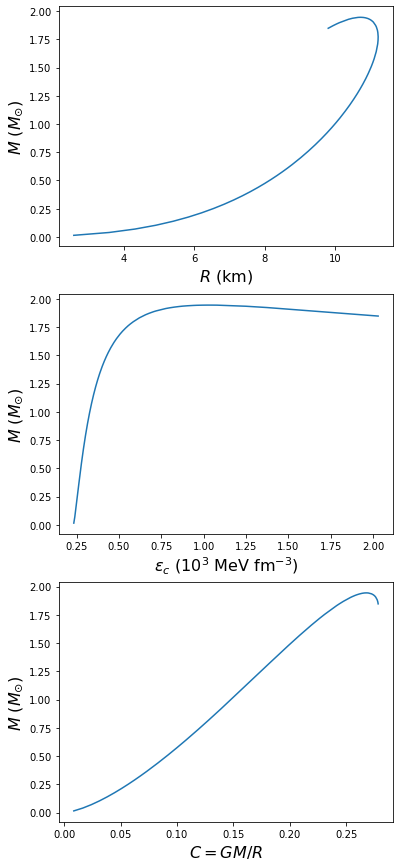

In [15]:
# plot all PCC

radmass=np.loadtxt("radmassST.dat")[:, :]
dataEden=radmass[:,1]
dataRad=radmass[:,2]
dataMass=radmass[:,3]
dataCompactness=radmass[:,4]

fig, ax = plt.subplots(3, 1, figsize = (6,15))

ax[0].plot(dataRad, dataMass)
ax[0].set_xlabel(r'$R$ (km)', fontsize=16)
ax[0].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

ax[1].plot(dataEden, dataMass)
ax[1].set_xlabel(r'$\epsilon_c$ ($10^3$ MeV fm$^{-3}$)', fontsize=16)
ax[1].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

ax[2].plot(dataCompactness, dataMass)
ax[2].set_xlabel(r'$C=GM/R$', fontsize=16)
ax[2].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

plt.show()

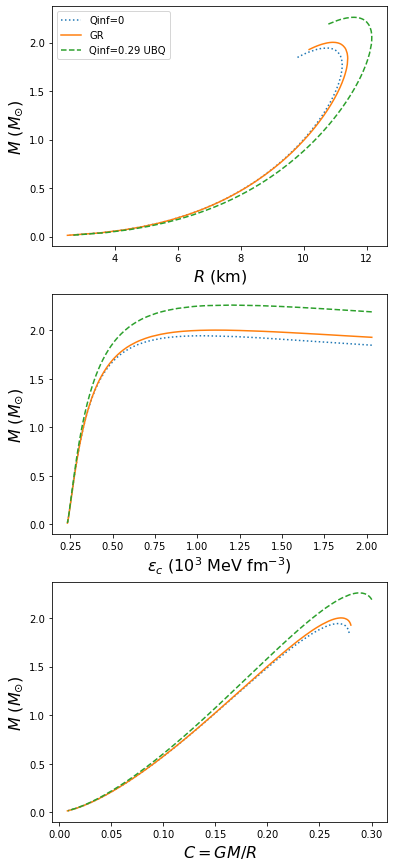

In [20]:
# extra

radmass=np.loadtxt("radmassST_Qnol.dat")[:, :]
dataEden=radmass[:,1]
dataRad=radmass[:,2]
dataMass=radmass[:,3]
dataCompactness=radmass[:,4]

radmass=np.loadtxt("radmass.dat")[:, :]
dataEdenGR=radmass[:,1]
dataRadGR=radmass[:,2]
dataMassGR=radmass[:,3]
dataCompactnessGR=radmass[:,4]

radmass=np.loadtxt("radmassST_bigQ.dat")[:, :]
dataEdenST_bigQ=radmass[:,1]
dataRadST_bigQ=radmass[:,2]
dataMassST_bigQ=radmass[:,3]
dataCompactnessST_bigQ=radmass[:,4]

fig, ax = plt.subplots(3, 1, figsize = (6,15))

ax[0].plot(dataRad, dataMass, label='Qinf=0', linestyle='dotted') 
ax[0].plot(dataRadGR, dataMassGR, label='GR', linestyle='solid')
ax[0].plot(dataRadST_bigQ, dataMassST_bigQ, label='Qinf=0.29 UBQ', linestyle='dashed')
ax[0].set_xlabel(r'$R$ (km)', fontsize=16)
ax[0].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

ax[1].plot(dataEden, dataMass, label='Qinf=0', linestyle='dotted')
ax[1].plot(dataEdenGR, dataMassGR, label='GR', linestyle='solid')
ax[1].plot(dataEdenST_bigQ, dataMassST_bigQ, label='Qinf=0.29 UBQ', linestyle='dashed')
ax[1].set_xlabel(r'$\epsilon_c$ ($10^3$ MeV fm$^{-3}$)', fontsize=16)
ax[1].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

ax[2].plot(dataCompactness, dataMass, label='Qinf=0', linestyle='dotted')
ax[2].plot(dataCompactnessGR, dataMassGR, label='GR', linestyle='solid')
ax[2].plot(dataCompactnessST_bigQ, dataMassST_bigQ, label='Qinf=0.29 UBQ', linestyle='dashed')
ax[2].set_xlabel(r'$C=GM/R$', fontsize=16)
ax[2].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

ax[0].legend()

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()